### Importação dos dados



In [47]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# ETAPA 1 – Análise das Métricas

*   Faturamento total
*   Categorias mais populares
*   Média de avaliação dos clientes
*   Produtos mais e menos vendidos
*   Frete médio


## 1.1 Função para fazer a análise de uma loja

In [50]:
# Função para fazer a análise de uma loja
def analisar_loja(loja, nome_loja):
    print(f"📊 Análise da {nome_loja}")

    # Faturamento total (soma da coluna preço)
    faturamento = loja["Preço"].sum()
    print(f"🔸 Faturamento total: R${faturamento:.2f}")

    # Categoria mais popular (com base na quantidade de vendas por categoria)
    categoria_popular = loja["Categoria do Produto"].value_counts().idxmax()
    print(f"🔸 Categoria com maior número de vendas: {categoria_popular}")

    # Média da avaliação dos clientes
    media_avaliacao = loja["Avaliação da compra"].mean()
    print(f"🔸 Média de avaliação: {media_avaliacao:.2f}")

    # Top 5 produtos mais vendidos (por quantidade de registros)
    mais_vendidos = loja["Produto"].value_counts().head(5)
    print("\n🏆 Top 5 Produtos Mais Vendidos:")
    for produto, qtd in mais_vendidos.items():
        categoria = loja[loja["Produto"] == produto]["Categoria do Produto"].iloc[0]
        print(f"🔹 {produto} ({categoria}) - {qtd} vendas")

    # Top 5 produtos menos vendidos
    menos_vendidos = loja["Produto"].value_counts().sort_values().head(5)
    print("\n📉 Top 5 Produtos Menos Vendidos:")
    for produto, qtd in menos_vendidos.items():
        categoria = loja[loja["Produto"] == produto]["Categoria do Produto"].iloc[0]
        print(f"🔹 {produto} ({categoria}) - {qtd} vendas")

    # Produto mais vendido
    #produto_mais_vendido = loja["Produto"].value_counts().idxmax()
    #print(f"🔸 Produto mais vendido: {produto_mais_vendido}")

    # Produto menos vendido
    #produto_menos_vendido = loja["Produto"].value_counts().idxmin()
    #print(f"🔸 Produto menos vendido: {produto_menos_vendido}")

    # Frete médio
    frete_medio = loja["Frete"].mean()
    print(f"🔸 Frete médio: R${frete_medio:.2f}")
    print("-" * 50)

## 1.2 Executar a análise para todas as lojas

In [ ]:
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [51]:
# Agrupando todas em uma lista para facilitar o loop
lojas = [loja, loja2, loja3, loja4]
nomes = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

# Agora que temos a função e as lojas carregadas, podemos rodar a análise:
for loja, nome in zip(lojas, nomes):
    analisar_loja(loja, nome)


📊 Análise da Loja 1
🔸 Faturamento total: R$1534509.12
🔸 Categoria com maior número de vendas: moveis
🔸 Média de avaliação: 3.98

🏆 Top 5 Produtos Mais Vendidos:
🔹 Micro-ondas (eletrodomesticos) - 60 vendas
🔹 TV Led UHD 4K (eletronicos) - 60 vendas
🔹 Guarda roupas (moveis) - 60 vendas
🔹 Secadora de roupas (eletrodomesticos) - 58 vendas
🔹 Cômoda (moveis) - 56 vendas

📉 Top 5 Produtos Menos Vendidos:
🔹 Headset (eletronicos) - 33 vendas
🔹 Celular ABXY (eletronicos) - 33 vendas
🔹 Panela de pressão (utilidades domesticas) - 35 vendas
🔹 Pandeiro (instrumentos musicais) - 36 vendas
🔹 Mochila (esporte e lazer) - 39 vendas
🔸 Frete médio: R$34.69
--------------------------------------------------
📊 Análise da Loja 2
🔸 Faturamento total: R$1488459.06
🔸 Categoria com maior número de vendas: moveis
🔸 Média de avaliação: 4.04

🏆 Top 5 Produtos Mais Vendidos:
🔹 Iniciando em programação (livros) - 65 vendas
🔹 Micro-ondas (eletrodomesticos) - 62 vendas
🔹 Bateria (instrumentos musicais) - 61 vendas
🔹 Vio

# ETAPA 2 - Geração de Gráficos

## 2.1 Faturamento por loja

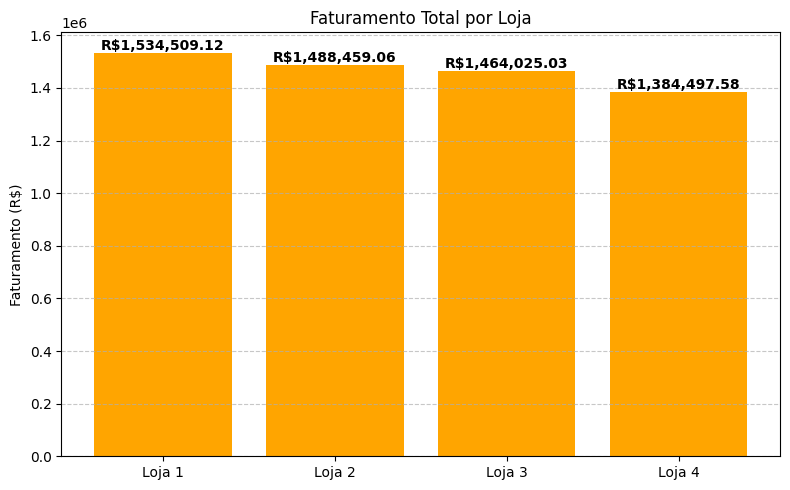

In [ ]:
import matplotlib.pyplot as plt

# Faturamento por loja
faturamentos = [loja["Preço"].sum() for loja in lojas]

plt.figure(figsize=(8, 5))
barras = plt.bar(nomes, faturamentos, color='orange')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adicionando os valores nas barras
for barra, valor in zip(barras, faturamentos):
    plt.text(barra.get_x() + barra.get_width()/2, valor + 10, f"R${valor:,.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 2.2 Frete médio por loja

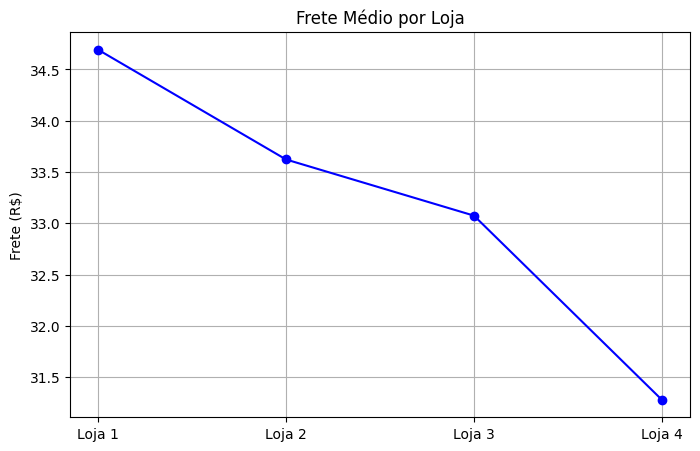

In [ ]:
# Frete médio por loja
fretes = [loja["Frete"].mean() for loja in lojas]

plt.figure(figsize=(8, 5))
plt.plot(nomes, fretes, marker='o', linestyle='-', color='blue')
plt.title("Frete Médio por Loja")
plt.ylabel("Frete (R$)")
plt.grid(True)
plt.show()

## 2.3 Média das avaliações por loja

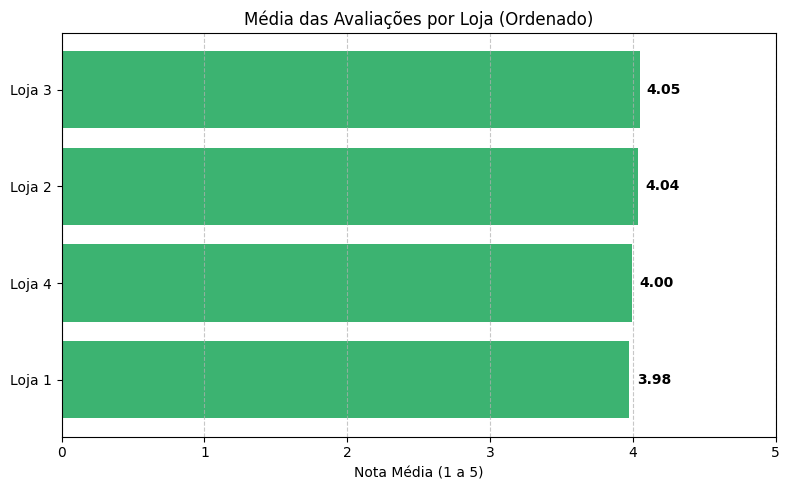

In [ ]:
# Calcula as médias e junta com os nomes
avaliacoes = [(nome, loja["Avaliação da compra"].mean()) for nome, loja in zip(nomes, lojas)]

# Ordena (do menor para o maior)
avaliacoes.sort(key=lambda x: x[1])  # Mude para reverse=True para ordem decrescente

# Separa os nomes e valores novamente
nomes_ordenados = [x[0] for x in avaliacoes]
valores_ordenados = [x[1] for x in avaliacoes]

# Gráfico
plt.figure(figsize=(8, 5))
barras = plt.barh(nomes_ordenados, valores_ordenados, color='mediumseagreen')
plt.title("Média das Avaliações por Loja (Ordenado)")
plt.xlabel("Nota Média (1 a 5)")
plt.xlim(0, 5)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Adiciona os valores no final das barras
for barra, valor in zip(barras, valores_ordenados):
    plt.text(valor + 0.05, barra.get_y() + barra.get_height()/2,
             f"{valor:.2f}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ETAPA 3 - Relatório Final – Recomendação

In [ ]:
print(avaliacoes)
print(type(avaliacoes[0]))

[('Loja 1', np.float64(3.976685036032217)), ('Loja 4', np.float64(3.9957591178965224)), ('Loja 2', np.float64(4.037303942348453)), ('Loja 3', np.float64(4.048325561678677))]
<class 'tuple'>


In [ ]:
# Criação do relatório dinâmico final

faturamentos = [loja["Preço"].sum() for loja in lojas]
fretes = [loja["Frete"].mean() for loja in lojas]
avaliacoes = [loja["Avaliação da compra"].mean() for loja in lojas]

# Encontrar os índices das lojas com maior/menor faturamento, avaliação e frete
idx_maior_faturamento = faturamentos.index(max(faturamentos))
idx_menor_faturamento = faturamentos.index(min(faturamentos))

idx_maior_frete = fretes.index(max(fretes))
idx_menor_frete = fretes.index(min(fretes))

idx_pior_avaliacao = avaliacoes.index(min(avaliacoes))
idx_melhor_avaliacao = avaliacoes.index(max(avaliacoes))

# Gera o relatório
print("📋 RELATÓRIO FINAL - Análise das Lojas\n")
print(f"💰 A loja com *maior faturamento* foi a **{nomes[idx_maior_faturamento]}** com R$ {faturamentos[idx_maior_faturamento]:,.2f}.")
print(f"📉 A loja com *menor faturamento* foi a **{nomes[idx_menor_faturamento]}** com R$ {faturamentos[idx_menor_faturamento]:,.2f}.\n")

print(f"🚚 Em relação ao *frete*, a loja com o frete médio mais alto foi a **{nomes[idx_maior_frete]}** (R$ {fretes[idx_maior_frete]:.2f}), enquanto a loja com o frete mais baixo foi a **{nomes[idx_menor_frete]}** (R$ {fretes[idx_menor_frete]:.2f}).\n")

print(f"⭐ A pior média de avaliação foi da **{nomes[idx_pior_avaliacao]}** com nota média {avaliacoes[idx_pior_avaliacao]:.2f}.")
print(f"📈 Já a melhor média de avaliação foi da **{nomes[idx_melhor_avaliacao]}** com nota {avaliacoes[idx_melhor_avaliacao]:.2f}.\n")

print("📌 Conclusão:")
print(f"A **{nomes[idx_menor_faturamento]}** apresentou o *menor desempenho geral*, com o menor faturamento e a segunda pior avaliação média entre as lojas.")
print("Apesar de ter o frete mais barato, isso não foi suficiente para compensar os resultados fracos em vendas e avaliações.")
print(f"👉 Portanto, recomendamos que o Sr. João considere vender a **{nomes[idx_menor_faturamento]}** para investir em um novo negócio.")

📋 RELATÓRIO FINAL - Análise das Lojas

💰 A loja com *maior faturamento* foi a **Loja 1** com R$ 1,534,509.12.
📉 A loja com *menor faturamento* foi a **Loja 4** com R$ 1,384,497.58.

🚚 Em relação ao *frete*, a loja com o frete médio mais alto foi a **Loja 1** (R$ 34.69), enquanto a loja com o frete mais baixo foi a **Loja 4** (R$ 31.28).

⭐ A pior média de avaliação foi da **Loja 1** com nota média 3.98.
📈 Já a melhor média de avaliação foi da **Loja 3** com nota 4.05.

📌 Conclusão:
A **Loja 4** apresentou o *menor desempenho geral*, com o menor faturamento e a segunda pior avaliação média entre as lojas.
Apesar de ter o frete mais barato, isso não foi suficiente para compensar os resultados fracos em vendas e avaliações.
👉 Portanto, recomendamos que o Sr. João considere vender a **Loja 4** para investir em um novo negócio.
